# D212 Data Mining II - Clustering Techniques
<br>David Harvell
<br>Master of Science, Data Analytics
<br>October 2021
<br>
<br>

#### <font color="blue">A-1. Propose one question relevant to a real-world organizational situation that you will answer using one clustering techniques.</font>

We will investigate a churn dataset for a telecom company. A common analysis with service providers is churn, and how it can be prevented. We will investigate a collection of customer attributes and see if any of the seem to be common in customers that leave for another provider.
<br><br>
This analysis will be performed using <strong>K-Means</strong> clustering and we will attempt to measure our accuracy with silhouette scoring.

#### <font color="blue">A-2. Define one goal of the data analysis.</font>

The goal of this analysis is to determine if there are key customer attributes that are associated with churn. If any are defined, the telecom company will be able to save substantial overhead with focused customer retention plans.

#### <font color="blue">B-1. Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.</font>

K-Means is an unsupervised clustering algorithm. This is due to the fact that we don't tell the algorithm any data that should be grouped - we let it perform its analysis and arrive at its own set of conclusions.
<br><br>
The algorithm works using an iterative process that runs until the cluster results are consistent. At the beginning of each run, "K" random points are selected from the dataset to be centroids. Each point is "clustered" to the closest centroid and a new centroid is calculated using the mean of the points in each cluster.  This process happens until the mean stops moving the centroids. These steps encompass a singe "run" of the algorithm (Dabbura, 2020).
<br><br>
Results could vary drastically, so multiple runs are used with different starting centroids, and the version with the least variance between it's points and the centroids is chose as the best clustering. The default number of runs in Python is 10, but that can be overriden with a different number if preferred.
<br><br>
While processing each set of variables, we will determine the most desirable number of clusters. After that determination, we will run K-Means and visualize the different clusters of data-points. At this point we will compare the clusters to churn and see if any appear to indicate a higher probability of churn.  

#### <font color="blue">B-2. Summarize one assumption of the clustering technique.</font>

One of the main assumptions in K-Means is the idea that clusters are roughly the same size (Tait, 2017). This can prove to be a drawback when data should be clustered into groups that have a large size variance.

#### <font color="blue">B-3. List the packages or libraries you have chosen for Python, and justify how each item on the list supports the analysis.</font>

The following libraries will be used for this analysis -
<br><br>

|Package|Purpose|
|:--|:--|
|Pandas|Arrange and filter data in a tabular manner|
|NumPy|Shorcut to advanced mathmatical and list-based functionality|
|MatPlotLib|Plotting to visualize results|
|Seaborn|For enhanced styling on plots|
|SciPy.Cluster|The SciPy implementations of K-Means, VQ, and possibly Whiten for scaling|
|SciPy.PreProcessing|Other possibilities for scaling, including StandardScaler|
|YellowBrick.Cluster|Provides implementation of Silhouette scoring and visualization for accuracy test|


#### <font color="blue">C-1. Describe one data preprocessing goal.</font>

The goal of our data preprocessing will be cleaning the data, transforming were necessary (i.e. categorical to continous), and scaling to avoid inflated representations.
<br><br>
Data Preprocessing Steps:
1. We will begin by trimming the dataset down to the columns that we are investigating
2. Next, we will ridentify each column as <strong>categorical</strong> or <strong>continuous</strong>
3. Review the selected fields to check for missing values or outliers that might need removal
4. Next, all categorical fields will need to be converted to continous values for evaluation with K-Means
5. Finally, we will scale all values so that no impacts are exaggerated due to a field using a large range of values

#### <font color="blue">C-2. Identify the initial dataset variables that you will use to perform the analysis, and label each as continuous or categorical.</font>

I plan on limiting the dataset to the columns below.  Only the <strong>categorical</strong> variables will be used for the K-Means analysis.  Afterwards, I will attempt to compare clustering to the customers that churn in order to identify customer groups at risk of leaving.
<br>

|Variable|Type|Use in K-Means|
|:--|:--|--:|
|Tenure|Continuous|YES|
|Yearly_equip_failure|Continuous|YES|
|Outage_sec_perweek|Continuous|YES|
|Bandwidth_GB_Year|Continuous|YES|
|Churn|Categorical|NO|

#### <font color="blue">C-3. Explain each of the steps used to prepare the data for the analysis.

We will follow the steps below for data cleansing:
    
1. Load the dataset
2. Review all columns included
3. Remove any unnecessary columns
4. Review sample data from a subset of records
5. Cleanse where needed
7. Scale the data

<br>
<strong>Load the dataset</strong>

In [1]:
import pandas as pd
import numpy as np

# Show all columns when reviewing
pd.options.display.max_columns = None

# Load the dataset
df = pd.read_csv('churn_clean.csv')

<br><strong>Review all columns included</strong>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

<br><strong>Remove any unnecessary columns</strong>

In [3]:
df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Job','Children','Marital','Gender','Email','Contacts','Population','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Age','MonthlyCharge','Contract','InternetService','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Income'], inplace=True)
df.columns

Index(['Churn', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'Bandwidth_GB_Year'],
      dtype='object')

<br><strong>Review sample data</strong>

In [4]:
df.sample(5)

,Churn,Outage_sec_perweek,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
631,Yes,13.265082,1,19.178217,2031.266556
1120,No,5.478738,0,10.925110,1696.540148
1416,Yes,12.292789,0,21.131185,2543.181756
8094,No,7.838764,0,67.219090,6255.953775
4284,No,12.093890,0,10.154510,1224.727640


<br><strong>Cleanse where needed</strong>

>Check for null values

In [5]:
# Check for null values
df.isnull().sum()

Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
Bandwidth_GB_Year       0
dtype: int64

>Save the churn values so we can compare against clustering results in the final analysis.

In [6]:
churn_values = df['Churn']
df.drop(columns='Churn', inplace=True)

>Review the ranges of the remaining <strong>continuous</strong> variables.

In [7]:
df.describe()

,Outage_sec_perweek,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.001848,0.398000,34.526188,3392.341550
std,2.976019,0.635953,26.443063,2185.294852
min,0.099747,0.000000,1.000259,155.506715
25%,8.018214,0.000000,7.917694,1236.470827
50%,10.018560,0.000000,35.430507,3279.536903
75%,11.969485,1.000000,61.479795,5586.141369
max,21.207230,6.000000,71.999280,7158.981530


>Check for extreme outliers that might cause data issues.

array([[<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>]], dtype=object)

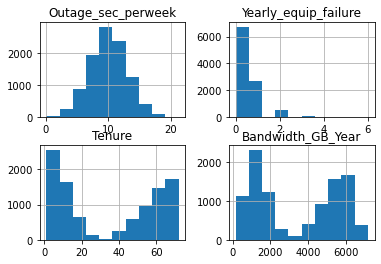

In [8]:
df.hist()

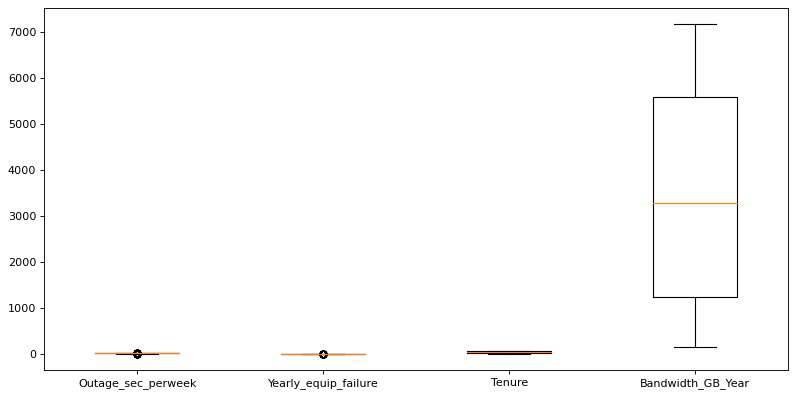

In [9]:
# Review box plots for an intial impression of range and distribution of variables
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
boxplot = plt.boxplot(df, labels=df.columns)

>There do not appear to be significant sets of outliers.

<br><strong>Scale the data</strong>

I am going to create two slices of the data in scaled form.  One with all attributes and another with a subset that seem most relevant.

In [10]:
from sklearn.preprocessing import StandardScaler

standardization = StandardScaler(with_mean=True, with_std=True)
df_scaled = standardization.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

<br><strong>Final review of the dataset prior to analysis</strong>

In [11]:
df_scaled.head()

,Outage_sec_perweek,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
0,-0.679978,0.946658,-1.048746,-1.138487
1,0.570331,0.946658,-1.262001,-1.185876
2,0.252347,0.946658,-0.709940,-0.612138
3,1.650506,-0.625864,-0.659524,-0.561857
4,-0.623156,0.946658,-1.242551,-1.428184


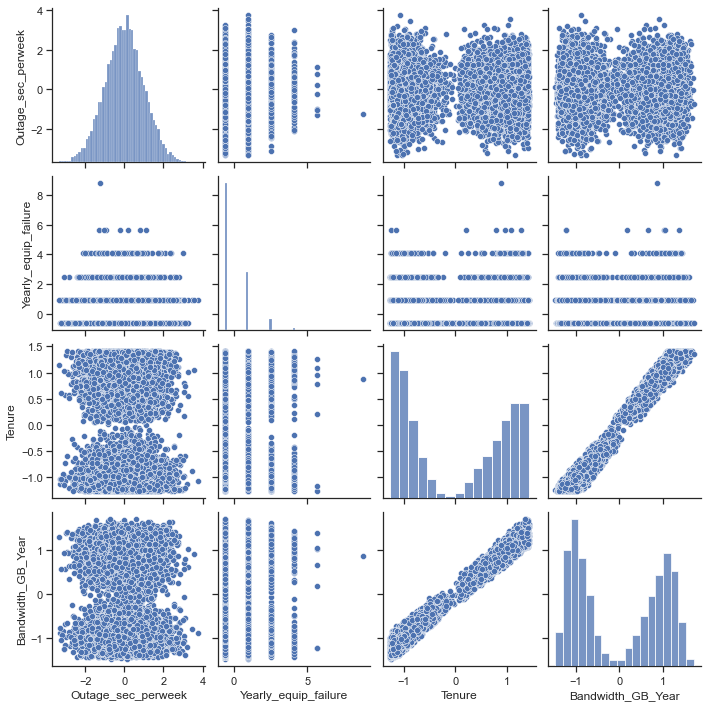

In [12]:
# Review the pair plot of all columns
# This would give a general idea of distributions and general correlations between pairs of variables
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_scaled)

#### <font color="blue">C-4. Provide a copy of the cleaned dataset.</font>

See uploaded attachments for cleaned datasets.

In [13]:
df_scaled.to_csv('churn_clean_postprocessing.csv', index=False)

#### <font color="blue">D-1. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</font>

We will now perform K-Means clustering on the data.  We will check a varying amount of clusters and record the silhouette score after each.  Based on the silhouette scores, we can make a recommendation for the number of clusters.

#### <font color="blue">D-2. Provide the code used to perform the clustering analysis technique.</font>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

df_scaled = pd.read_csv('churn_clean_postprocessing.csv')
df_scaled.describe()

,Outage_sec_perweek,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9.823253e-17,-5.953460e-16,1.149791e-15,2.119371e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.327464e+00,-6.258635e-01,-1.267917e+00,-1.481263e+00
25%,-6.665728e-01,-6.258635e-01,-1.006306e+00,-9.865847e-01
50%,5.615783e-03,-6.258635e-01,3.420043e-02,-5.162246e-02
75%,6.611971e-01,9.466579e-01,1.019358e+00,1.003942e+00
max,3.765413e+00,8.809265e+00,1.417195e+00,1.723716e+00


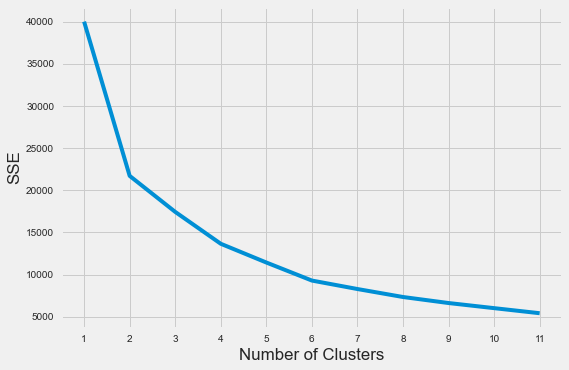

In [15]:
sse = []
max_cluster_count = 12

for k in range(1, max_cluster_count):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=40)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, max_cluster_count), sse)
plt.xticks(range(1, max_cluster_count))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

<br><br><br><br>Based on the elbow chart above, we would expect the best number of clusters to fall between 2 and 6.

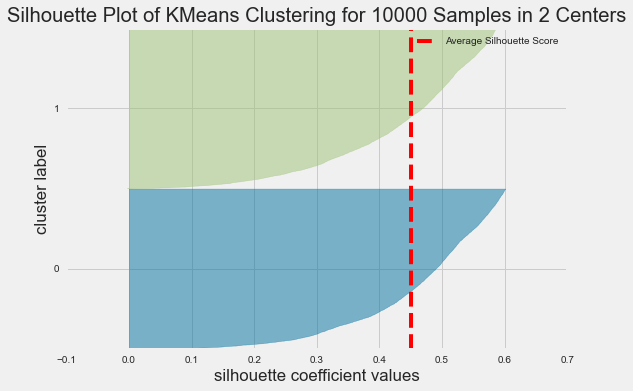

4 COLUMNS:  2 clusters - score = 0.44975394460694607


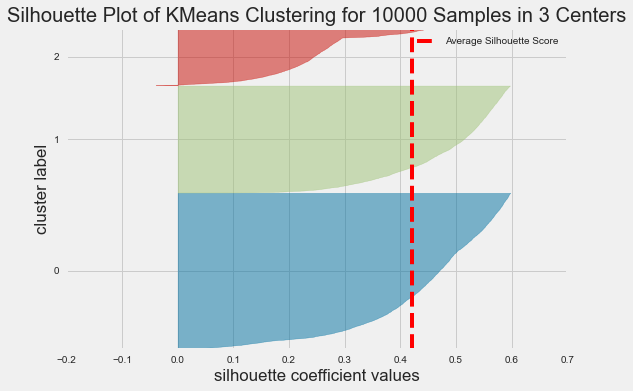

4 COLUMNS:  3 clusters - score = 0.4208701076402844


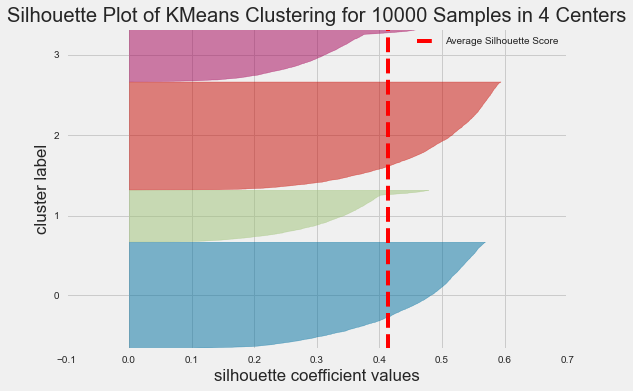

4 COLUMNS:  4 clusters - score = 0.4142525075920017


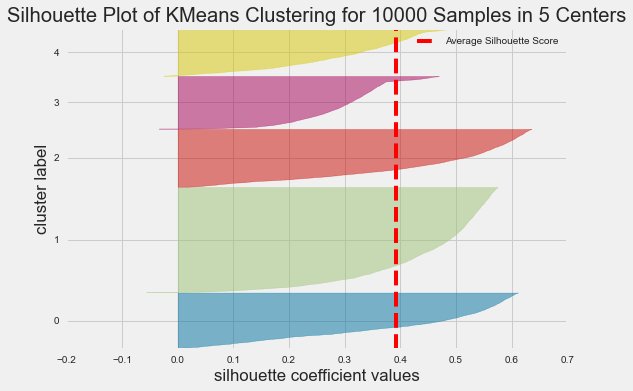

4 COLUMNS:  5 clusters - score = 0.39181314213160534


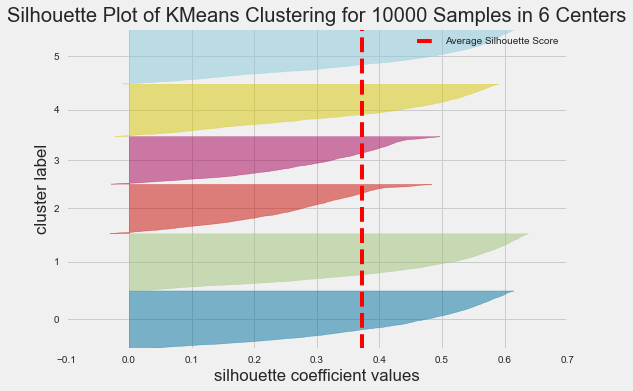

4 COLUMNS:  6 clusters - score = 0.37191493872016407


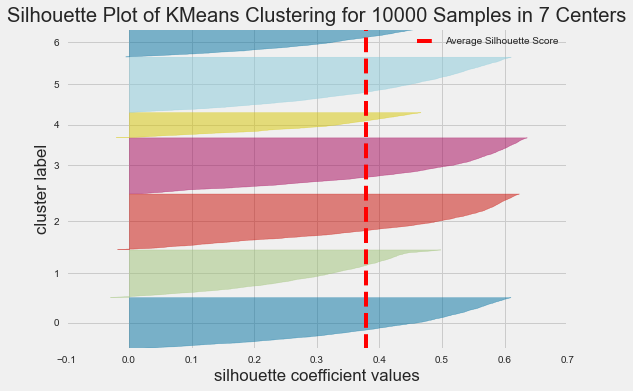

4 COLUMNS:  7 clusters - score = 0.37903666917186607


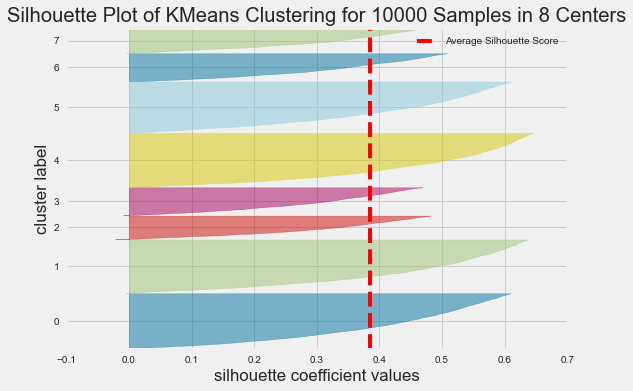

4 COLUMNS:  8 clusters - score = 0.38481279588248435


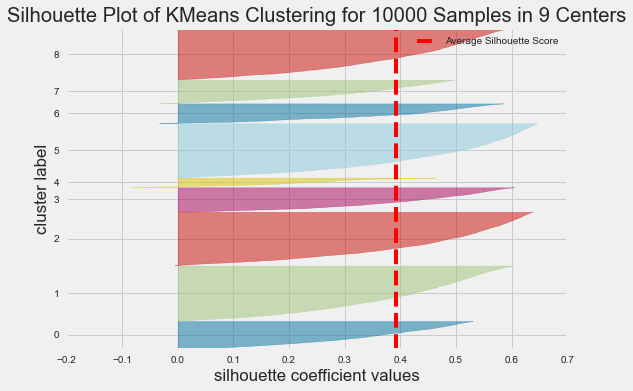

4 COLUMNS:  9 clusters - score = 0.39154622013237833


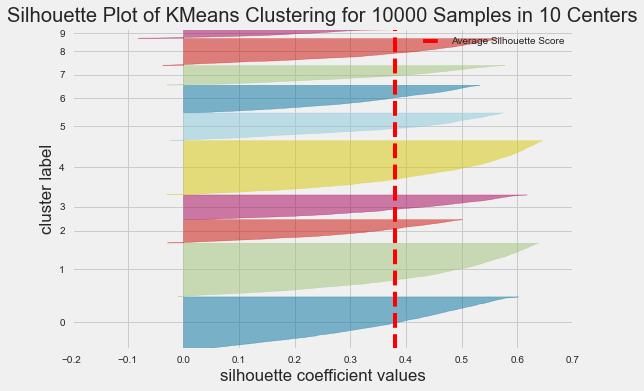

4 COLUMNS:  10 clusters - score = 0.3803632635972186


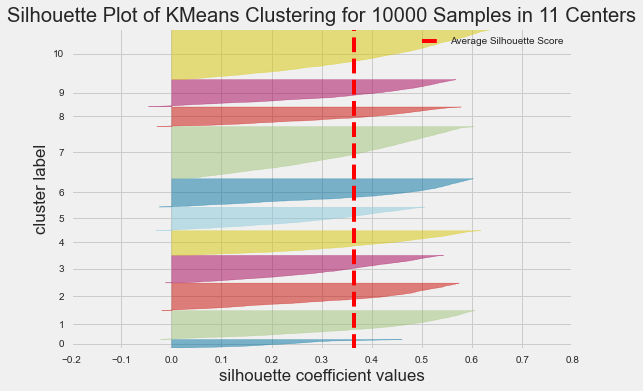

4 COLUMNS:  11 clusters - score = 0.3646667407646596


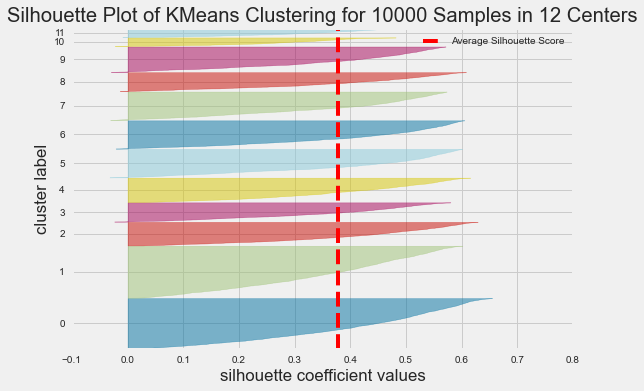

4 COLUMNS:  12 clusters - score = 0.3778724308042656


In [16]:
silhoutte_scores = []

for i in range(2, max_cluster_count+1):
    model = KMeans(n_clusters=i, n_init=20, random_state=40)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_scaled)        # Fit the data to the visualizer
    score = visualizer.silhouette_score_
    silhoutte_scores.append(score)
    visualizer.show()
    print(f"{df_scaled.shape[1]} COLUMNS:  {i} clusters - score = {score}")

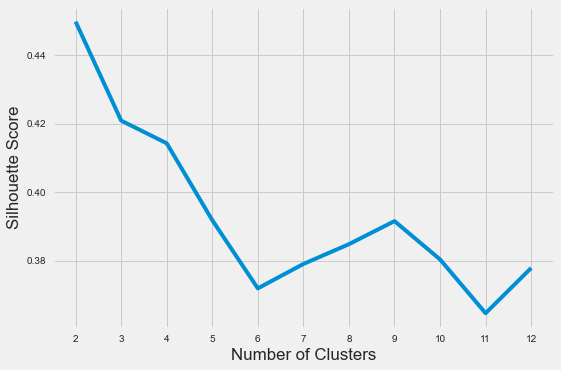

In [17]:
plt.plot(range(2, max_cluster_count+1), silhoutte_scores)
plt.xticks(range(2, max_cluster_count+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Now that we have the clusters, lets get the cluster labels and reintroduce Churn. This will allow us to determine the churn rate for each cluster.

In [18]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=40)
kmeans.fit(df_scaled)

conditions = [(churn_values) == 'Yes', (churn_values == 'No')]
values = [1,0]
new_churn_col = np.select(conditions, values)
df_scaled['churn'] = new_churn_col
df_scaled['label'] = kmeans.labels_

In [19]:
cluster_0_churn_rate = df_scaled.loc[df_scaled['label'] == 0]['churn'].sum() / df_scaled.loc[df_scaled['label'] == 0]['churn'].count()
cluster_1_churn_rate = df_scaled.loc[df_scaled['label'] == 1]['churn'].sum() / df_scaled.loc[df_scaled['label'] == 1]['churn'].count()

In [20]:
print("Cluster 0 has a churn rate of {:.2%}".format(cluster_0_churn_rate))
print("Cluster 1 has a churn rate of {:.2%}".format(cluster_1_churn_rate))

Cluster 0 has a churn rate of 47.33%
Cluster 1 has a churn rate of 5.66%


#### <font color="blue">E-1. Explain the accuracy of your clustering technique.</font>

Accuracy for this model runs between a silhouette score of 0.37 and 0.44.  This is <strong>not</strong> a high value for accuracy.

#### <font color="blue">E-2. Discuss the results and implications of your clustering analysis.</font>

Based on the accuracies, I would suggest having two primary clusters for the customers.  Using this suggestion, we were able to calculate churn rates for both. This provides insight as to where customer retention resources should be focused.
<br><br>
As we add more datapoints, we can continue to test until we have a silhoutte score closer to 1, and then note the attributes that are common in the clusters with the highest rates of churn.

#### <font color="blue">E-3. Discuss one limitation of your data analysis.</font>

One limitation is the availability of key data points to include in the analysis. Some items that could have a large impact include: current usage, scale of cost compared to other providers in the area, outstanding contractual obligations, and more. More data can tell a more complete story.  Without some of these very relevant and impactful variables, we are more prone to make incorrect assumptions.

#### <font color="blue">E-4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</font>

Based on the results, I would perform the following actions:

1. Collect more data points
2. Continue to test the expanded dataset, using a varying amount of clusters until we have a high accuracy
3. Determine the attributes that are in clusters with a high rate of churn
4. Create a focused marketing/engagement plan to retain that specific set of customer

OR

5. Develop a plan to change the attributes of those customers so they will shift to another cluster and be less likely to churn (i.e. cause the at risk customer to use more/less bandwidth until they are no longer part of the "at risk" cluster)

More specifically with the data provided, we can see that Cluster 1 has a <strong>much</strong> higher churn rate (10x).  At a bare minimum, I would look at the values that cause a customer to be part of Cluster 1 (ranges of outage, equip failure, tenure, and bandwidth), and devote resources into retaining those customers.  Using this cluster analysis has let us know that at least half of our customer base is at low risk of churn, and should not receive as many resources for retention.

#### <font color="blue">Code References</font>
<br>
Silhouette Visualizer — Yellowbrick v1.3.post1 documentation. (n.d.). Yellowbrick. Retrieved October 19, 2021, from https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

#### <font color="blue">References</font>
<br>
Dabbura, I. (2020, August 10). K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. Towards Data Science. Retrieved October 18, 2021, from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
<br><br>
Tait, A. (2017, January 31). » Assumptions Can Ruin Your K-Means Clusters. Learning Tree International. Retrieved October 18, 2021, from https://blog.learningtree.com/assumptions-ruin-k-means-clusters/